In [1]:
# Импортируем библиотеки необходимые для работы
import pandas as pd
import seaborn as sns
import scipy as scipy
from scipy import stats
%matplotlib inline

In [2]:
# датасет запишем в переменную "experiment"
experiment = pd.read_csv('experiment_lesson_4.csv')

In [25]:
experiment.head()

order_id  delivery_time  district experiment_group
0      3159           44.0  Purlieus          control
1     10426           51.0  Purlieus          control
2      9155           46.0  Purlieus          control
3     10699           34.0  Purlieus          control
4     10061           43.0  Purlieus          control

In [64]:
experiment.shape #размерность датафрейма

(20196, 4)

In [65]:
experiment.info() #информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.2+ KB


In [13]:
experiment.describe()

order_id  delivery_time
count  20196.000000   20196.000000
mean   11103.503565      42.054169
std     5835.424404      10.382196
min     1000.000000      10.000000
25%     6048.750000      35.000000
50%    11109.500000      42.000000
75%    16158.250000      49.000000
max    21207.000000      83.000000

In [63]:
experiment.isna().sum() #проверка NAN

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [66]:
delivery_time_control = experiment.query('experiment_group == "control"').delivery_time #сортируем контрольную группу

In [67]:
delivery_time_test = experiment.query('experiment_group == "test"').delivery_time #сортируем тестовую группу

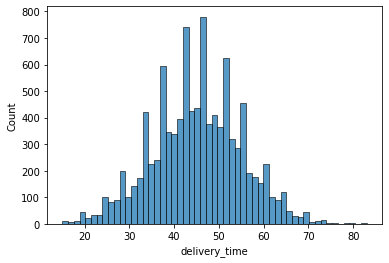

In [68]:
sns.histplot(delivery_time_control) # средние время заказов контрольной группы

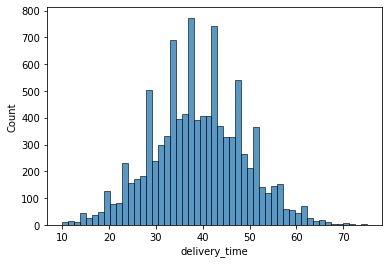

In [70]:
sns.histplot(delivery_time_test) # средние время заказов тестовой группы

In [71]:
delivery_time_control.count() #кол-во эелементов в контрольной группе

10092

In [72]:
delivery_time_test.count() #кол-во эелементов в тестовой группе

10104

### Проверим распределение 1000 элементов в контрольной и тестовой группе 
### Тест Шапиро-Уилка 

In [38]:
experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17) 

17877    37.0
18499    39.0
16476    48.0
14602    30.0
16719    25.0
         ... 
12410    40.0
18882    47.0
15944    47.0
14618    41.0
18816    36.0
Name: delivery_time, Length: 1000, dtype: float64

In [39]:
experiment[experiment['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

7144    42.0
6231    42.0
6902    41.0
7032    54.0
2009    44.0
        ... 
752     54.0
3754    63.0
5420    64.0
8119    49.0
4804    45.0
Name: delivery_time, Length: 1000, dtype: float64

In [43]:
scipy.stats.shapiro(experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17))

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [44]:
scipy.stats.shapiro(experiment[experiment['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

### pvalue=0.1241 , значит с данными все хорошо

In [73]:
experiment[experiment['experiment_group'] == 'control']['delivery_time'].std() # стандартное отклонение контрольной группы

9.990016960246372

In [74]:
experiment[experiment['experiment_group'] == 'test']['delivery_time'].std() # стандартное отклонение тестовой группы

9.883308351129061

### проводим t-test 

In [48]:
stats.ttest_ind(experiment[experiment['experiment_group'] == 'control']['delivery_time'], experiment[experiment['experiment_group'] == 'test']['delivery_time'])

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

### получившиеся pvalue < 0.05 значит получившиеся результаты тестовой группы статистически важны.

In [55]:
experiment[experiment['experiment_group'] == 'control']['delivery_time'].mean()

45.065101070154576

In [59]:
experiment[experiment['experiment_group'] == 'test']['delivery_time'].mean()

39.04681314330958

In [62]:
round((experiment[experiment['experiment_group'] == 'test']['delivery_time'].mean()*100)/\
experiment[experiment['experiment_group'] == 'control']['delivery_time'].mean(),2)-100

-13.349999999999994

### благодаря новой системе мы уменьшили среднее время доставки на 13.35 %